In [2]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
import seaborn as sns
sns.set()

## Data exploration

In [3]:
raw_data = pd.read_csv('2nd_Hand_Car_Price_Prediction.csv')
raw_data.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4


In [4]:
raw_data.describe()

,Price,Mileage,EngineV,Year
count,4173.000000,4345.000000,4195.000000,4345.000000
mean,19418.746935,161.237284,2.790734,2006.550058
std,25584.242620,105.705797,5.066437,6.719097
min,600.000000,0.000000,0.600000,1969.000000
25%,6999.000000,86.000000,1.800000,2003.000000
50%,11500.000000,155.000000,2.200000,2008.000000
75%,21700.000000,230.000000,3.000000,2012.000000
max,300000.000000,980.000000,99.990000,2016.000000


In [5]:
raw_data.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058,NaN
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


## Data cleaning

We will drop the `Model` column as it is not crucial

In [6]:
data = raw_data.drop(['Model'], axis=1)

In [7]:
data.isnull().sum()

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
dtype: int64

In [8]:
total_cells = np.product(data.shape)
total_missing = data.isnull().sum().sum()
print(f'Missing {(total_missing/total_cells)*100}%')

Missing 0.9263521288837744%


In [9]:
data_no_mv = data.dropna(axis=0)

In [10]:
data_no_mv.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4025,4025.000000,4025,4025.000000,4025.000000,4025,4025,4025.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1534,NaN,NaN,1861,3654,NaN
mean,NaN,19552.308065,NaN,163.572174,2.764586,NaN,NaN,2006.379627
std,NaN,25815.734988,NaN,103.394703,4.935941,NaN,NaN,6.695595
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,90.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,158.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21900.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


### Exploring Distributions

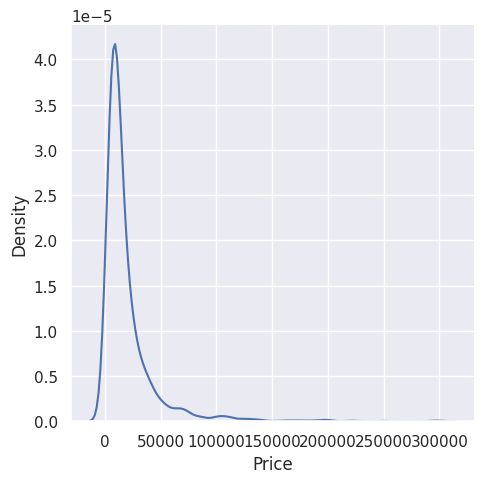

In [11]:
sns.displot(data_no_mv['Price'], kind='kde')

### Dealing with outliers

The mean of the `Price` variable is 19,552, 75% of its values are below 21,900, while its max value is 300,000; so there a lot of outliers. To remove outliers we can remove the top 1% of values using `pd.quantile` or `np.percentile`.

In [12]:
q = data_no_mv['Price'].quantile(.99)
data_1 = data_no_mv[data_no_mv['Price'] < q]

In [13]:
sns.displot(data_1['Price'], kind='kde')

#### We'll do the same to `Mileage` and `EngineV` columns

In [14]:
q = data_1['Mileage'].quantile(.99)
data_2 = data_1[data_1['Mileage'] < q]

In [15]:
data_3 = data_2[data_2['EngineV'] < 6.5]

In [16]:
q = data_3['Year'].quantile(.01)
data_4 = data_3[data_3['Year'] > q]

In [17]:
cleaned_data = data_4.reset_index(drop=True)

In [18]:
cleaned_data.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3867,3867.000000,3867,3867.000000,3867.000000,3867,3867,3867.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,848,NaN,1467,NaN,NaN,1807,3505,NaN
mean,NaN,18194.455679,NaN,160.542539,2.450440,NaN,NaN,2006.709853
std,NaN,19085.855165,NaN,95.633291,0.949366,NaN,NaN,6.103870
min,NaN,800.000000,NaN,0.000000,0.600000,NaN,NaN,1988.000000
25%,NaN,7200.000000,NaN,91.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11700.000000,NaN,157.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,21700.000000,NaN,225.000000,3.000000,NaN,NaN,2012.000000


## Checking OLS assumptions

The categorical variables will be included as dummies so we don't need to worry about them when checking the assumptions.
We will look at `Price`, `Year`, `EngineV` and `Mileage`.

### Checking for linearity between each regressor and the target

In [19]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize=(15, 3))

ax1.scatter(cleaned_data['Year'], cleaned_data['Price'])
ax1.set_title('Price and Year')

ax2.scatter(cleaned_data['EngineV'], cleaned_data['Price'])
ax2.set_title('Price and EngineV')

ax3.scatter(cleaned_data['Mileage'], cleaned_data['Price'])
ax3.set_title('Mileage and Year')

Text(0.5, 1.0, 'Mileage and Year')

The relationships are not linear, so we should transform the variables before running a LR model.

In [20]:
sns.displot(cleaned_data['Price'], kind='kde')

Going back to the distribution plot of `Price`, we notice that it has an exponential distribution, log transformations are especially useful when facing exponential distributions.

In [21]:
log_price = np.log(cleaned_data['Price'])
cleaned_data['log_price'] = log_price
cleaned_data = cleaned_data.drop(['Price'], axis=1)

In [22]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize=(15, 3))

ax1.scatter(cleaned_data['Year'], cleaned_data['log_price'])
ax1.set_title('log_price and Year')

ax2.scatter(cleaned_data['EngineV'], cleaned_data['log_price'])
ax2.set_title('log_price and EngineV')

ax3.scatter(cleaned_data['Mileage'], cleaned_data['log_price'])
ax3.set_title('log_price and Year')

Text(0.5, 1.0, 'log_price and Year')

We now observe a linear relationship between `log_price` and all of the regressors.

### Endogeneity is skipped as it is not violated here.

### Normality and Homoscedasticity
1. Normality: due to center limit theorem, we assume the error term is normally distributed.
2. Zero mean: since we have an intercept in our LR, then we assume the error term has zero mean.
3. Homoscedasticity: this problem is solved since we already log transformed `Price`.

### Autocorrelation is skipped due to this being cross-sectional data.

### Multicollinearity

We expect `Year` and `Mileage` to be collinear, we can verify this using the VIF.

In [23]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

variables = cleaned_data[['Mileage', 'Year', 'EngineV']]
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif['Features'] = variables.columns
vif

,VIF,Features
0,3.791584,Mileage
1,10.354854,Year
2,7.662068,EngineV


We will disregard `Year`

In [24]:
data_no_multicollinearity = cleaned_data.drop(['Year'], axis=1)

## Handling categorical data
When creating dummy variables, we always drop the first value so as to not introduce multicollinearity to the model

In [25]:
data_with_dummies = pd.get_dummies(data_no_multicollinearity, drop_first=True)

In [26]:
data_with_dummies.head()

,Mileage,EngineV,log_price,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,277,2.0,8.342840,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,427,2.9,8.974618,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,358,5.0,9.495519,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,240,4.2,10.043249,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,120,2.0,9.814656,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1


In [27]:
data_with_dummies.columns

Index(['Mileage', 'EngineV', 'log_price', 'Brand_BMW', 'Brand_Mercedes-Benz',
       'Brand_Mitsubishi', 'Brand_Renault', 'Brand_Toyota', 'Brand_Volkswagen',
       'Body_hatch', 'Body_other', 'Body_sedan', 'Body_vagon', 'Body_van',
       'Engine Type_Gas', 'Engine Type_Other', 'Engine Type_Petrol',
       'Registration_yes'],
      dtype='object')

In [28]:
cols = ['Mileage', 'EngineV', 'log_price', 'Brand_BMW', 'Brand_Mercedes-Benz',
       'Brand_Mitsubishi', 'Brand_Renault', 'Brand_Toyota', 'Brand_Volkswagen',
       'Body_hatch', 'Body_other', 'Body_sedan', 'Body_vagon', 'Body_van',
       'Engine Type_Gas', 'Engine Type_Other', 'Engine Type_Petrol',
       'Registration_yes']

data_preprocessed = data_with_dummies[cols]

## Modeling

In [29]:
targets = data_preprocessed['log_price']
inputs = data_preprocessed.drop(['log_price'], axis=1)

### Scaling data

In [30]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
inputs_scaled = scaler.fit_transform(inputs)

### Creating the regression

In [31]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(inputs_scaled, targets, test_size=0.2, random_state=365)

In [32]:
reg = LinearRegression()
reg.fit(x_train, y_train)

LinearRegression()

When plotting the predictions against the observed values, we want a linear relationship (or a somewhat 45 degree pattern in the resulting scatter plot), indicating that each observed value is equal or very close to the predicted value.

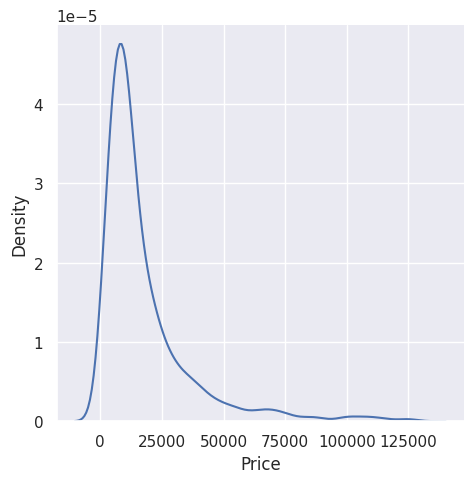

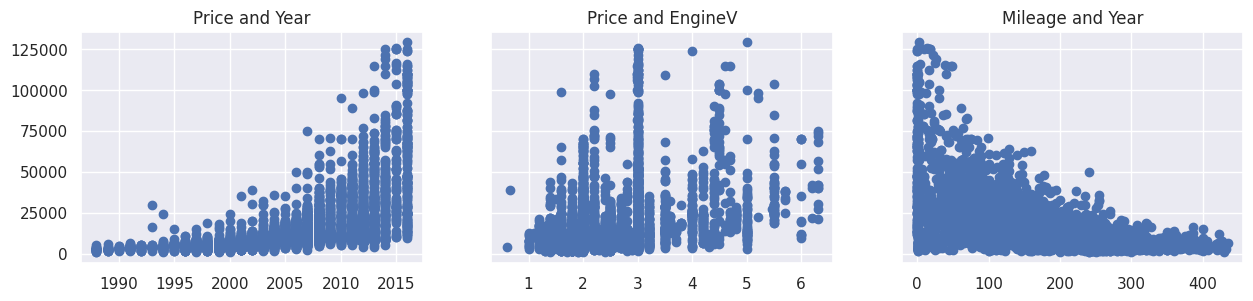

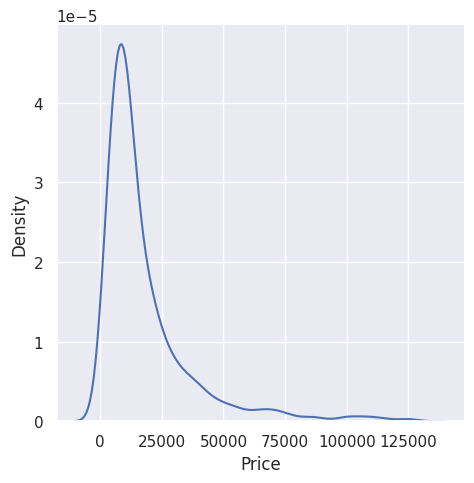

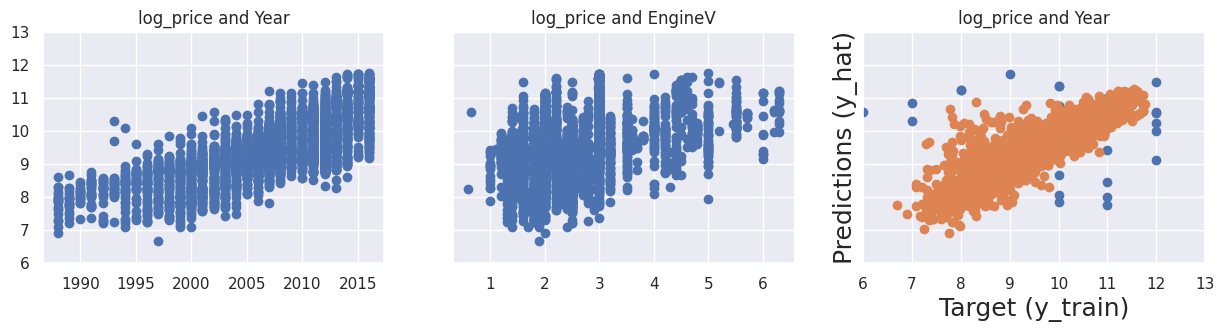

In [33]:
y_hat = reg.predict(x_train)

plt.scatter(y_train, y_hat)
plt.xlabel('Target (y_train)', size=18)
plt.ylabel('Predictions (y_hat)', size=18)
plt.xlim(6, 13)
plt.ylim(6, 13)
plt.show()

In [34]:
sns.displot(y_train - y_hat, kind='kde')

By looking at the residuals distribution, we see that the residuals are normally distributed with a mean of zero. We notice that the left tail of the distribution is quite long, meaning that some of the residuals were negative; which indicates that our model frequently predicted a higher price for the car than it truly was.

### R-squared and adjust r-squared

$\bar{R^2}=1-(1-R^2)*\frac{n-1}{n-p-1}$

In [35]:
reg.score(x_train, y_train)

0.744996578792662

In [36]:
r2 = reg.score(x_train, y_train)
n = x_train.shape[0]
p = x_train.shape[1]

1-(1-r2)*(n-1)/(n-p-1)

0.7435868037811093

### Examining coefficients

In [37]:
reg_summary = pd.DataFrame(inputs.columns.values, columns=['Features'])
reg_summary['Weights'] = reg.coef_
reg_summary

,Features,Weights
0,Mileage,-0.448713
1,EngineV,0.209035
2,Brand_BMW,0.014250
3,Brand_Mercedes-Benz,0.012882
4,Brand_Mitsubishi,-0.140552
5,Brand_Renault,-0.179909
6,Brand_Toyota,-0.060550
7,Brand_Volkswagen,-0.089924
8,Body_hatch,-0.145469
9,Body_other,-0.101444


For continuous variables, a positive weight means that as the feature increases so does `Price`, while a negative weight means that as the feauture increases the target decreases. In the case of categorical variables, since we have used dummies we have dropped one category for each categorical variable; so when all included dummies of a certain variable zero then the drop dummy is one. In the case of `Brand` we have dropped the `Audi` value, so that is the "benchmark". If another brand in the variable is positive that means it is more expensive than `Audi`, if it is negative that means it is cheaper.

## Testing

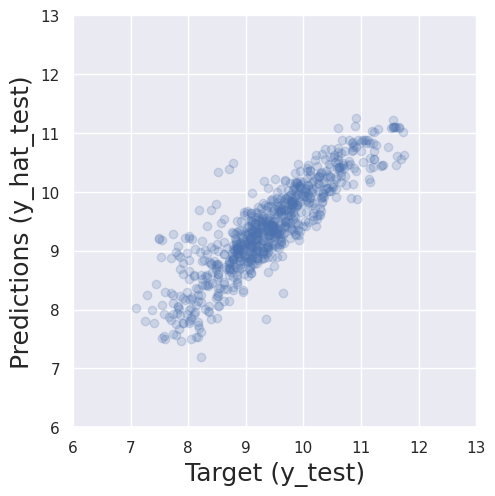

In [38]:
y_hat_test = reg.predict(x_test)

plt.scatter(y_test, y_hat_test, alpha=0.2)
plt.xlabel('Target (y_test)', size=18)
plt.ylabel('Predictions (y_hat_test)', size=18)
plt.xlim(6, 13)
plt.ylim(6, 13)
plt.show()

Again we observe a somewhat linear pattern in the scatter plot. However for higher prices we have a higher concentration around the 45 degree line, as opposed to for lower prices. This means our model predicts for higher prices than it does for lower ones.

### Assessing predictions manually

Since we used the log transformation before on the targets, we will apply `np.exp` to revert them back to their original form.

In [39]:
df_pf = pd.DataFrame(np.exp(y_hat_test), columns=['Predictions'])
df_pf['Targets'] = np.exp(y_test).reset_index(drop=True)

In [40]:
df_pf['Residuals'] = df_pf['Targets'] - df_pf['Predictions']
df_pf['Difference %'] = np.absolute(df_pf['Residuals'] / df_pf['Targets'] * 100)

In [41]:
df_pf.head()

,Predictions,Targets,Residuals,Difference %
0,10685.501696,2300.0,-8385.501696,364.587030
1,3499.255242,2800.0,-699.255242,24.973402
2,7553.285218,2500.0,-5053.285218,202.131409
3,7463.963017,6400.0,-1063.963017,16.624422
4,11353.490075,9150.0,-2203.490075,24.081859


In [42]:
df_pf.describe()

,Predictions,Targets,Residuals,Difference %
count,774.000000,774.000000,774.000000,774.000000
mean,15946.760167,18165.817106,2219.056939,36.256693
std,13133.197604,19967.858908,10871.218143,55.066507
min,1320.562768,1200.000000,-29456.498331,0.062794
25%,7413.644234,6900.000000,-2044.191251,12.108022
50%,11568.168859,11600.000000,142.518577,23.467728
75%,20162.408805,20500.000000,3147.343497,39.563570
max,77403.055224,126000.000000,85106.162329,512.688080


In [43]:
df_pf.sort_values(by=['Difference %'])

,Predictions,Targets,Residuals,Difference %
698,30480.847838,30500.0,19.152162,0.062794
742,16960.310476,16999.0,38.689524,0.227599
60,12469.207487,12500.0,30.792513,0.246340
110,25614.137960,25500.0,-114.137960,0.447600
367,42703.676996,42500.0,-203.676996,0.479240
...,...,...,...,...
657,32481.045510,6000.0,-26481.045510,441.350758
162,9954.416247,1800.0,-8154.416247,453.023125
451,35956.498331,6500.0,-29456.498331,453.176897
532,10019.903027,1800.0,-8219.903027,456.661279


We can see that the instances that were the most far off, have negative residuals, which means our model predicted a higher price than it really was. An explanation would be that we are missing an important factor, maybe the `Model` feature.